# Titanic Exercise

to install seaborn :
```bash
conda install -c conda-forge seaborn
````


In [1]:
import pandas as pd
from seaborn import load_dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
embarked_labels = {
  "C": "Cherbourg",
  "Q": "Queenstown",
  "S": "Southampton",
}

In [3]:
# 1. Load the dataset
titanic = load_dataset("titanic")
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 2. Data cleaning
# 2.1. Check the missing values
print(titanic.shape)
print(titanic.isnull().sum())

# 2.2. Replace the missing values in age with the mean
titanic["age"].fillna(titanic["age"].mean(), inplace=True)

# 2.3 rop unused columns
# titanic.drop("deck", axis=1, inplace=True)
titanic.drop(columns=["deck", "who", "embark_town", "class", "alive"], inplace=True)

# 2.4 drop the rows with missing values in embarked
titanic.dropna(subset=["embarked"], inplace=True)

# 2.5 Transform month age to 1 year
titanic.age = titanic.age.map(lambda age: 1 if age < 1 else age)

(891, 15)
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


/var/folders/64/8wr_1w5d38s7ynhph9nnfbhm0000gn/T/ipykernel_29292/1118756547.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic["age"].fillna(titanic["age"].mean(), inplace=True)


In [7]:
print(titanic.shape)
print(titanic.isnull().sum())
titanic.shape

(889, 10)
survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
adult_male    0
alone         0
dtype: int64


(889, 10)

In [8]:
# 3 Analyse data
# 3.1 Calculate the overall survival rate of the Titanic passengersata
survival_rate = titanic["survived"].sum() / titanic.shape[0] * 100
titanic.survived.value_counts(normalize=True)

survived
0    0.617548
1    0.382452
Name: proportion, dtype: float64

<Axes: xlabel='embarked'>

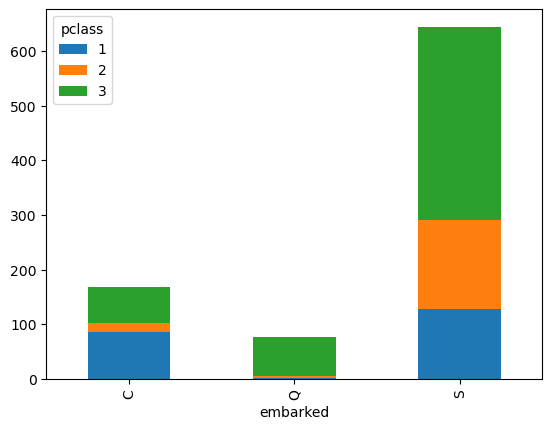

In [9]:
# 3.2 Analyze the distribution of passengers by class (Pclass) and by port of embarkation (Embarked).
# titanic.groupby(["embarked", "pclass"]).survived.count()
# titanic.groupby(["embarked", "pclass"]).survived.count().reset_index().pivot(index="embarked", columns="pclass", values="survived")
pd.crosstab(titanic.embarked, titanic.pclass).plot.bar(stacked=True)

In [10]:
# 3.3 Calculate the proportion of male and female passengers.
# male_passengers = titanic.sex == "male"
# male_passengers.value_counts()
gender_proportion: pd.Series = titanic.sex.value_counts(normalize=True) * 100
gender_proportion

sex
male      64.904387
female    35.095613
Name: proportion, dtype: float64

age
1.0     14
2.0     10
3.0      6
4.0     10
5.0      4
        ..
70.0     2
70.5     1
71.0     2
74.0     1
80.0     1
Name: count, Length: 84, dtype: int64

<Axes: xlabel='age'>

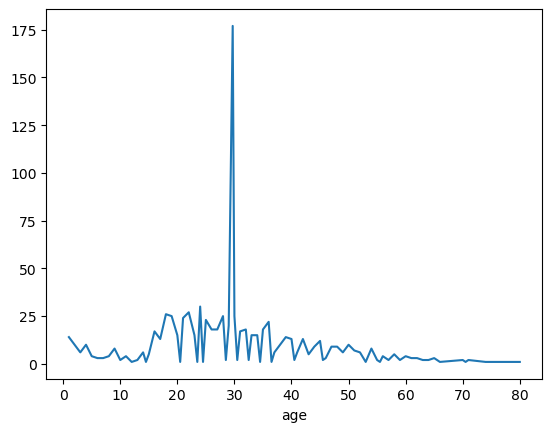

In [11]:
# 3.4 Identify the age distribution of passengers and find the most represented age categories.
display(titanic.age.value_counts().sort_index())
titanic.age.value_counts().sort_index().plot()

In [20]:
category_age = pd.cut(titanic.age, bins=[0, 12, 18, 30, 50, 75, 100], labels=["Enfant", "Adolescent", "Jeune adulte", "Adulte", "Senior", "Vieux"], right=False)
titanic["age_category"] = category_age
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone,age_category
0,0,3,male,22.000000,1,0,7.2500,S,True,False,Jeune adulte
1,1,1,female,38.000000,1,0,71.2833,C,False,False,Adulte
2,1,3,female,26.000000,0,0,7.9250,S,False,True,Jeune adulte
3,1,1,female,35.000000,1,0,53.1000,S,False,False,Adulte
4,0,3,male,35.000000,0,0,8.0500,S,True,True,Adulte
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,True,True,Jeune adulte
887,1,1,female,19.000000,0,0,30.0000,S,False,True,Jeune adulte
888,0,3,female,29.699118,1,2,23.4500,S,False,False,Jeune adulte
889,1,1,male,26.000000,0,0,30.0000,C,True,True,Jeune adulte


age_category
0-11      69
12-17     70
18-29    447
30-49    240
50+       63
Name: count, dtype: int64

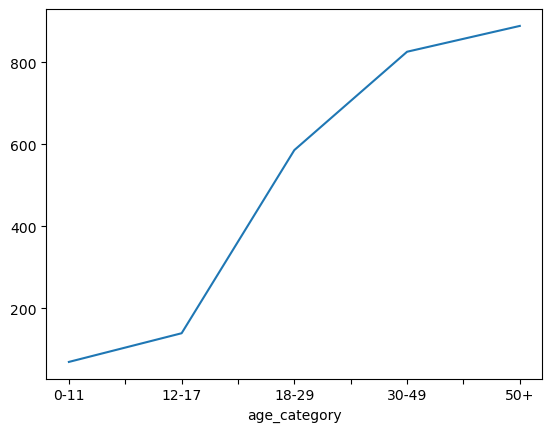

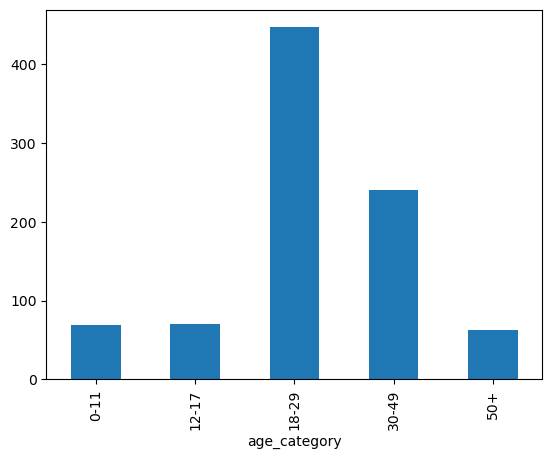

<Axes: xlabel='age_category'>

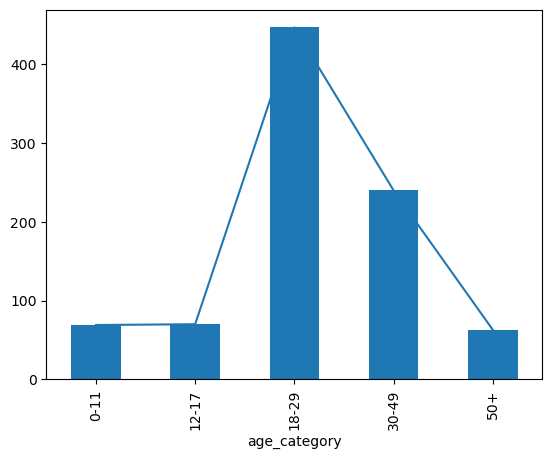

In [13]:
bins: list[int] = [0, 12, 18, 30, 50, 100]
labels: list[str] = ['0-11', '12-17', '18-29', '30-49', '50+']

titanic["age_category"] = pd.cut(titanic.age, bins=bins, labels=labels)
display(titanic.age_category.value_counts().sort_index())
titanic.age_category.value_counts().sort_index().cumsum().plot()
plt.show()
titanic.age_category.value_counts().sort_index().plot(kind="bar")
plt.show()
titanic.age_category.value_counts().sort_index().plot()
titanic.age_category.value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='pclass'>

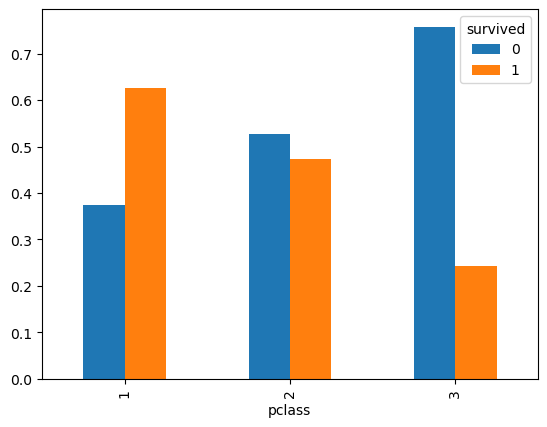

In [14]:
# 4 Alives analyse
# 4.1 Analyze survival based on ticket class (Pclass).
# titanic.groupby("pclass").survived.mean().plot(kind="bar")
titanic.groupby("pclass").survived.value_counts(normalize=True).unstack().plot(kind="bar")

array([<Axes: ylabel='0'>, <Axes: ylabel='1'>], dtype=object)

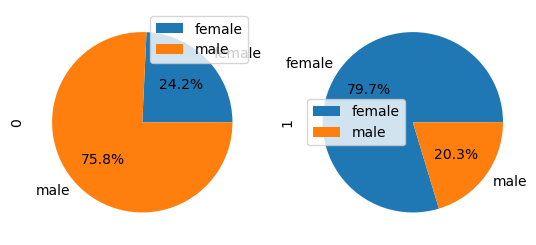

In [15]:
# 4.2 Analyze survival based on gender (Sex).

# survived_male = titanic[(titanic.survived == 1) & (titanic.sex == "male")].shape[0]
# survived_female = titanic[(titanic.survived == 1) & (titanic.sex == "female")].shape[0]
# print(survived_male / titanic.shape[0])
# print(survived_female / titanic.shape[0])

titanic.groupby("sex").survived.value_counts(normalize=True).unstack().plot(kind="pie", subplots=True, autopct="%1.1f%%")

<Axes: xlabel='pclass,sex'>

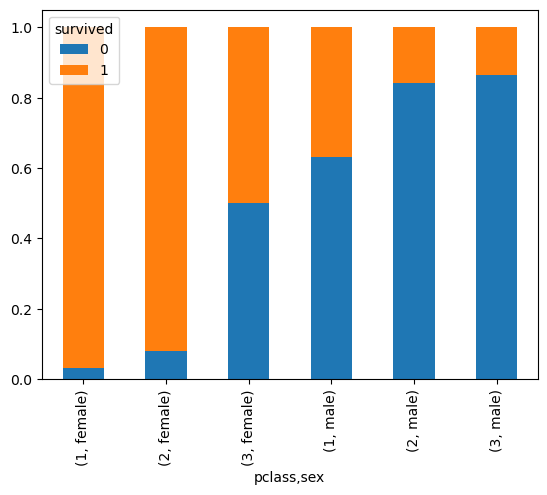

In [16]:
titanic.groupby(["pclass", "sex"]).survived\
  .value_counts(normalize=True).unstack()\
  .sort_index(level=[1], ascending=[True])\
  .plot.bar(stacked=True)

In [24]:
titanic.groupby("age_category").survived.value_counts(normalize=True).unstack() * 100

/var/folders/64/8wr_1w5d38s7ynhph9nnfbhm0000gn/T/ipykernel_29292/1056425375.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby("age_category").survived.value_counts(normalize=True).unstack() * 100


survived,0,1
age_category,,
Enfant,42.647059,57.352941
Adolescent,51.111111,48.888889
Jeune adulte,67.187500,32.812500
Adulte,58.431373,41.568627
Senior,65.277778,34.722222
Vieux,0.000000,100.000000


In [23]:
 titanic.groupby('embarked')['survived'].value_counts(normalize=True).unstack()

survived,0,1
embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


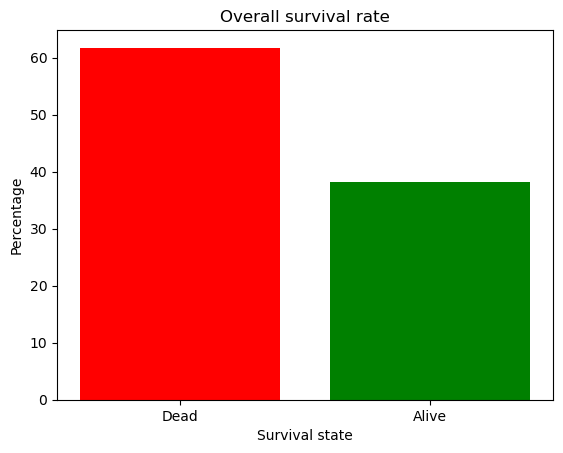

In [27]:
# 5 Plottings
# 5.1 Create a bar chart (plt.bar) to visualize the overall survival rate.

plt.bar(["Dead", "Alive"], [100-survival_rate, survival_rate], color=["r", "g"])
plt.title("Overall survival rate")
plt.xlabel("Survival state")
plt.ylabel("Percentage")
plt.show()

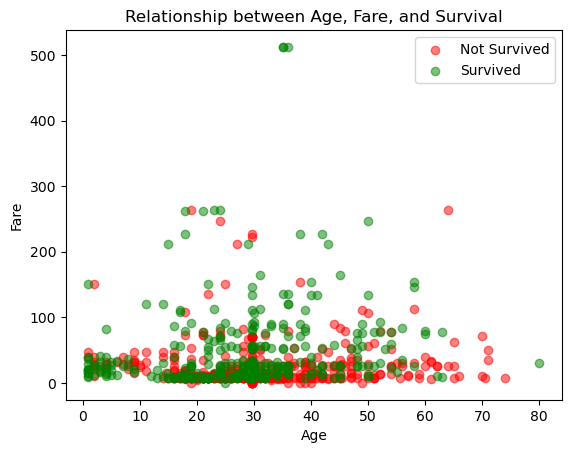

In [33]:
plt.scatter(
  titanic.loc[titanic.survived == 0].age, 
  titanic.loc[titanic.survived == 0].fare,
  c="r", label="Not Survived", alpha=0.5
)
plt.scatter(
  titanic.loc[titanic.survived == 1].age, 
  titanic.loc[titanic.survived == 1].fare,
  c="g", label="Survived", alpha=0.5
)

plt.title('Relationship between Age, Fare, and Survival')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()

/var/folders/64/8wr_1w5d38s7ynhph9nnfbhm0000gn/T/ipykernel_29292/2411157507.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


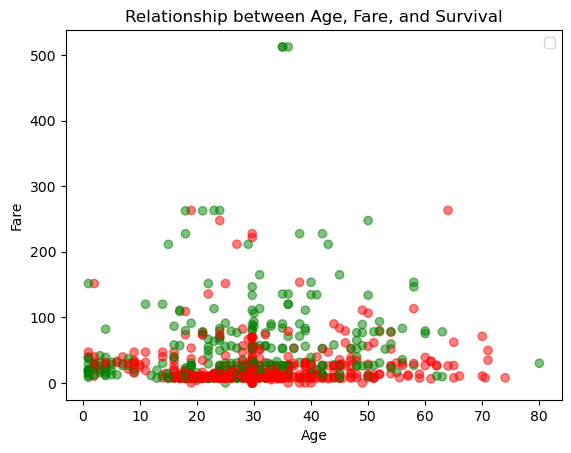

In [35]:
plt.scatter(
  titanic.age,
  titanic.fare,
  c=titanic.survived.map(lambda survival_value: "r" if survival_value == 0 else "g"),
  alpha=0.5
)

plt.title('Relationship between Age, Fare, and Survival')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()

/var/folders/64/8wr_1w5d38s7ynhph9nnfbhm0000gn/T/ipykernel_29292/160623109.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


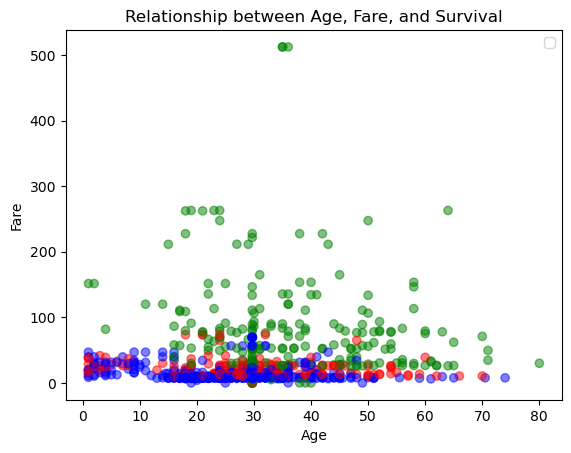

In [38]:
plt.scatter(
  titanic.age,
  titanic.fare,
  c=titanic.pclass.map(lambda survival_value: "g" if survival_value == 1 else "r" if survival_value == 2 else "b"),
  alpha=0.5
)

plt.title('Relationship between Age, Fare, and Survival')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Fare")

plt.show()

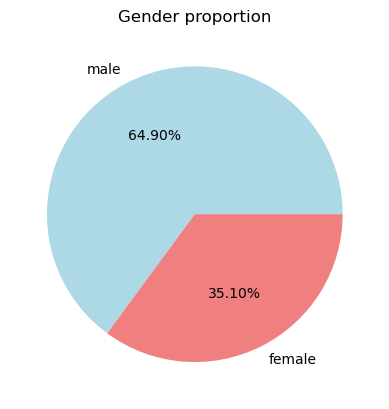

In [41]:
gender_proportion = titanic.sex.value_counts()
plt.pie(gender_proportion, labels=gender_proportion.index, colors=["lightblue", "lightcoral"], autopct="%.2f%%")
plt.title("Gender proportion")
plt.show()

embarked,C,Q,S
pclass,,,
1,85,2,127
2,17,3,164
3,66,72,353


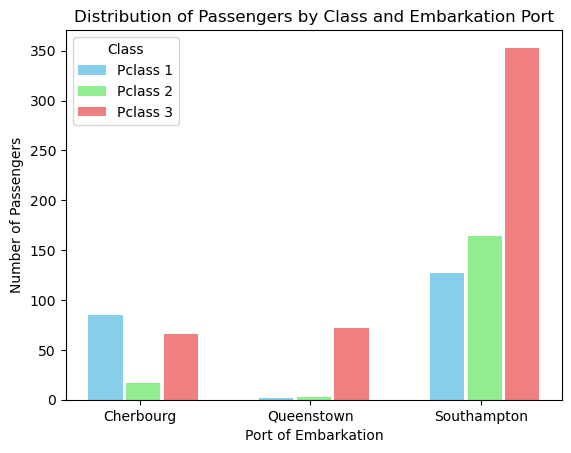

In [42]:
distribution_by_class_embarked = titanic.groupby(['pclass', 'embarked']).size().unstack()
display(distribution_by_class_embarked)

fig, ax = plt.subplots()
width = 0.2
class_labels: list[str] = distribution_by_class_embarked.columns.map(embarked_labels.get)
enu: list[tuple[int, tuple[int, str]]] = enumerate(zip(distribution_by_class_embarked.index, ["skyblue", "lightgreen", "lightcoral"]))
for i, (pclass, color) in enu:
  positions: list[int|float] = list(range(len(class_labels))) if i==0 else [pos + width + 0.02 for pos in positions]
  plt.bar(positions, distribution_by_class_embarked.loc[pclass], width=width, label=f'Pclass {pclass}', color=color)

# Adding labels and title
plt.title('Distribution of Passengers by Class and Embarkation Port')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.xticks([pos + width for pos in range(len(class_labels))], class_labels)
plt.legend(title='Class')

# Show the plot
plt.show()

pclass,1,2,3
embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


<Axes: xlabel='embarked'>

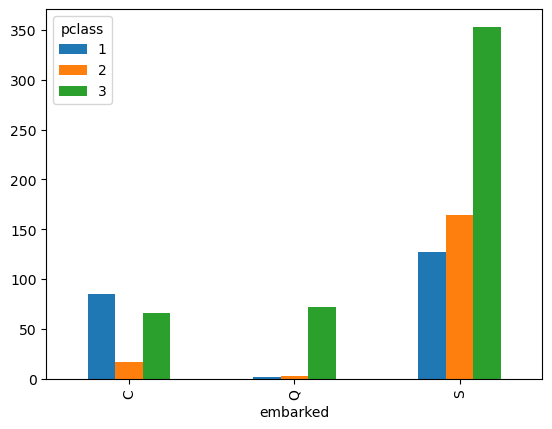

In [46]:
embarked_pclass = titanic.groupby(["embarked", "pclass"]).size().unstack()
display(embarked_pclass)
embarked_pclass.plot.bar()

,age,fare,pclass,sibsp,parch,survived,gender
age,1.000000,0.088602,-0.328025,-0.231908,-0.178146,-0.074497,-0.089491
fare,0.088602,1.000000,-0.548193,0.160887,0.217532,0.255290,0.179958
pclass,-0.328025,-0.548193,1.000000,0.081656,0.016824,-0.335549,-0.127741
sibsp,-0.231908,0.160887,0.081656,1.000000,0.414542,-0.034040,0.116348
parch,-0.178146,0.217532,0.016824,0.414542,1.000000,0.083151,0.247508
survived,-0.074497,0.255290,-0.335549,-0.034040,0.083151,1.000000,0.541585
gender,-0.089491,0.179958,-0.127741,0.116348,0.247508,0.541585,1.000000


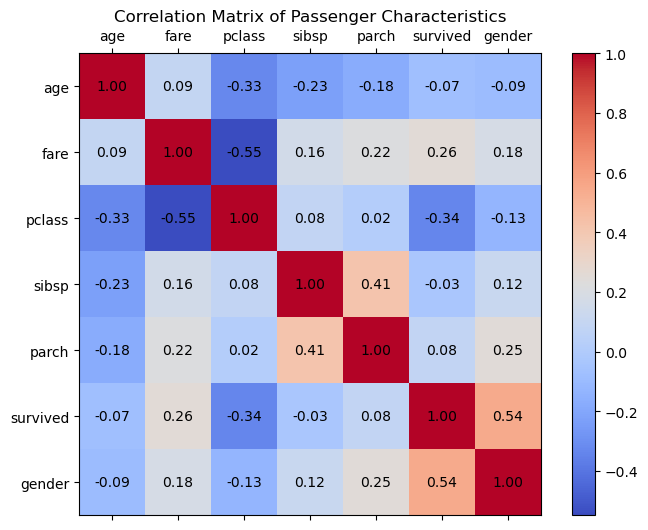

In [48]:
# 6 Bonus for the datascients experts ;P

# 6.1 Examine the correlation between different passenger characteristics to identify meaningful relationships.
# Select relevant columns for correlation analysis
correlation_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived', 'gender']
titanic['gender'] = titanic['sex'].map({'male': 0, 'female': 1})
# Create a correlation matrix
correlation_matrix = titanic[correlation_columns].corr()
display(correlation_matrix)

# Create a basic heatmap using Matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

# Set labels
ax.set_xticks(np.arange(len(correlation_columns)))
ax.set_yticks(np.arange(len(correlation_columns)))
ax.set_xticklabels(correlation_columns)
ax.set_yticklabels(correlation_columns)

# Display the correlation values
for i in range(len(correlation_columns)):
  for j in range(len(correlation_columns)):
    text = ax.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black')

# Set title
plt.title('Correlation Matrix of Passenger Characteristics')

# Show the plot
plt.show()

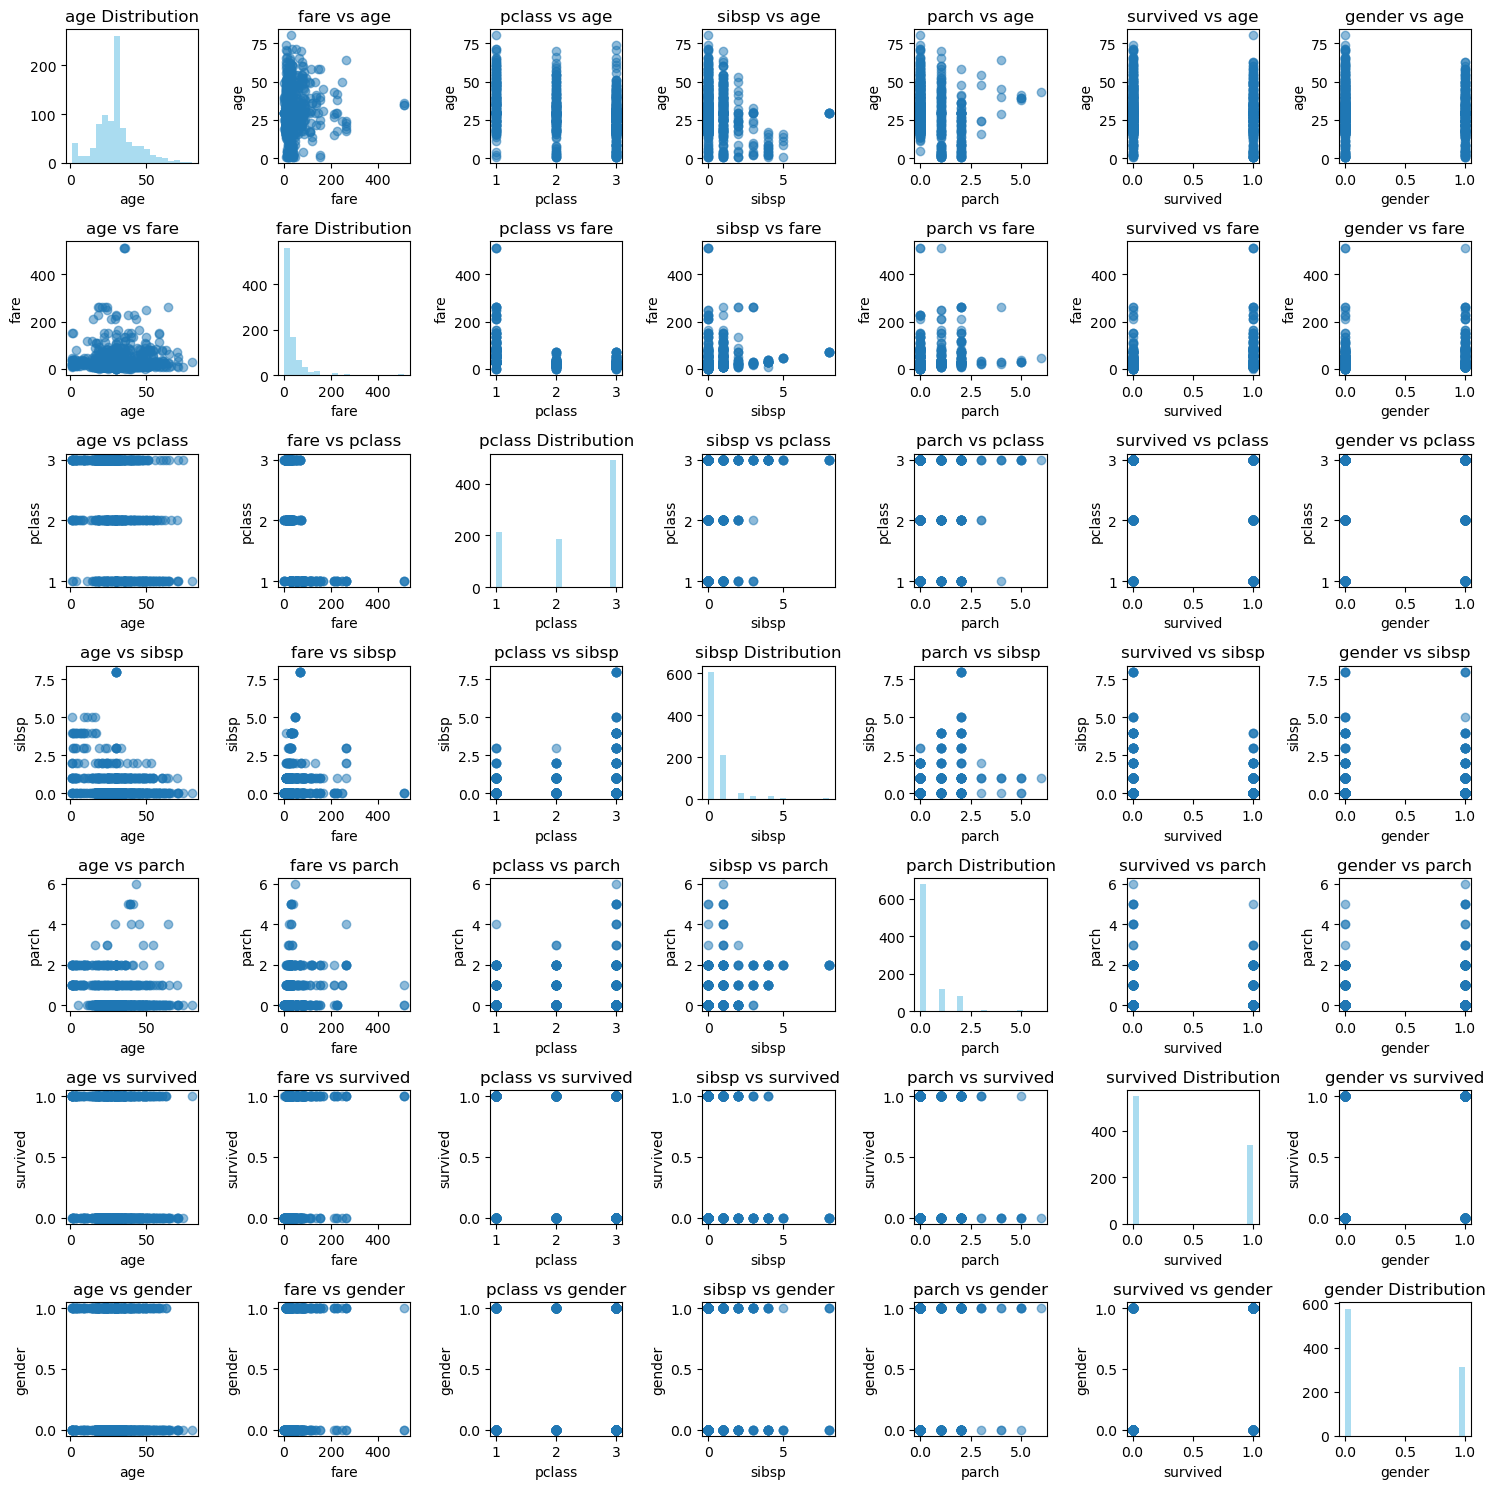

In [49]:
import numpy as np

# Select relevant numerical columns
numerical_columns = ['age', 'fare', 'pclass', 'sibsp', 'parch', 'survived', 'gender']

# Create a matrix of scatter plots
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=len(numerical_columns), figsize=(15, 15))

for i in range(len(numerical_columns)):
    for j in range(len(numerical_columns)):
        if i == j:
            axes[i, j].hist(titanic[numerical_columns[i]], bins=20, color='skyblue', alpha=0.7)
            axes[i, j].set_title(f'{numerical_columns[i]} Distribution')
            axes[i, j].set_xlabel(numerical_columns[i])
        else:
            axes[i, j].scatter(titanic[numerical_columns[j]], titanic[numerical_columns[i]], alpha=0.5)
            axes[i, j].set_title(f'{numerical_columns[j]} vs {numerical_columns[i]}')
            axes[i, j].set_xlabel(numerical_columns[j])
            axes[i, j].set_ylabel(numerical_columns[i])
            # a, b = np.polyfit(titanic[numerical_columns[j]], titanic[numerical_columns[i]], 1)
            # axes[i, j].plot(titanic[numerical_columns[j]], a*titanic[numerical_columns[j]]+b, c="r")
            # a, b = np.polyfit(titanic[numerical_columns[i]], titanic[numerical_columns[j]], 1)
            # axes[i, j].plot(titanic[numerical_columns[i]], a*titanic[numerical_columns[i]]+b, c="g")

# Adjust layout
plt.tight_layout()
plt.show()